In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from src.feature_matching import matching
# from scipy.spatial import cKDTree as KDTree


In [2]:
def SIFT(img_path):
    img = cv.imread(img_path)
    working_image = img.copy()
    img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
    
    sift = cv.xfeatures2d.SIFT_create()
    kp, des = sift.detectAndCompute(img,None)
    img_draw = cv.drawKeypoints(img,kp,img)
    
    plt.figure(figsize=(10, 10))
    plt.imshow(img_draw);
    plt.axis("off")
    plt.show()
    
    return working_image, kp, des

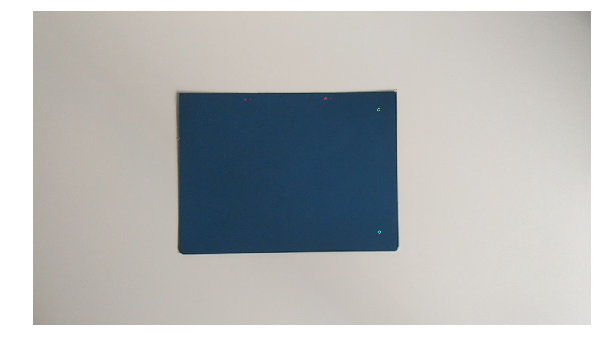

In [3]:
img1, kp1, des1 = SIFT('./input/frames/rotate/frame0.jpg')

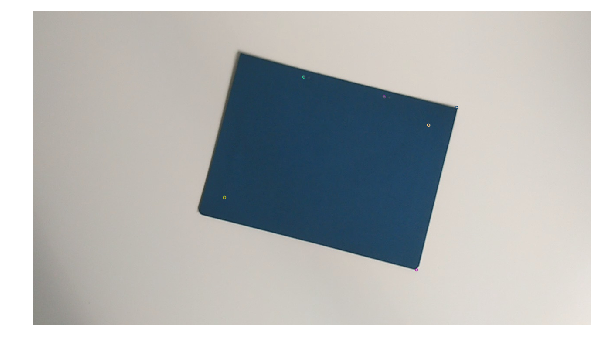

In [4]:
img2, kp2, des2 = SIFT('./input/frames/rotate/frame100.jpg')

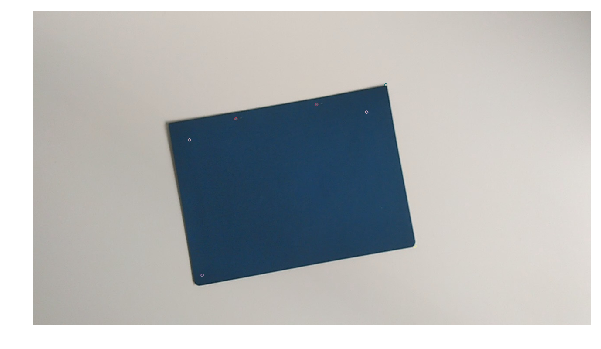

In [5]:
img3, kp3, des3 = SIFT('./input/frames/rotate/frame19.jpg')

In [12]:
def our_method(kp1, kp2, kp3):
    kp1 = np.array([i.pt for i in kp1])
    kp2 = np.array([i.pt for i in kp2])
    kp3 = np.array([i.pt for i in kp3])

    matching(kp1, kp2, des1, des2, img1, img2, "./output/feature_matching_1.jpg",140)
#     matching(kp2, kp3, des2, des3, img2, img3, "./output/feature_matching_2.jpg",120)

In [13]:
our_method(kp1, kp2, kp3)

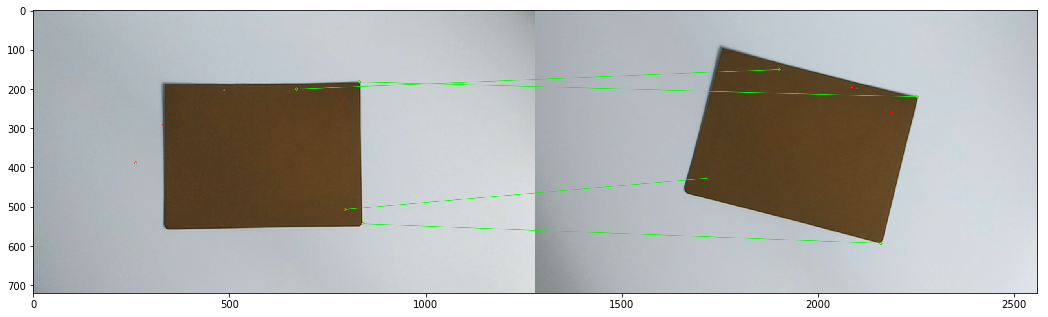

True

In [8]:
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)

matcher = cv.BFMatcher()
matches = matcher.knnMatch(des1, des2, k=2)

matchesMask = [[0, 0] for i in range(len(matches))]

for i, (m, n) in enumerate(matches):
    if m.distance < 0.8*n.distance:
        matchesMask[i] = [1, 0]

draw_params = dict(matchColor=(0, 255, 0),
                   singlePointColor=(255, 0, 0),
                   matchesMask=matchesMask,
                   flags=0)

img3 = cv.drawMatchesKnn(img1, kp1, img2, kp2, matches, None, **draw_params)
plt.figure(figsize=(18, 18))
plt.imshow(img3); plt.show()
cv.imwrite("./output/feature_matching_2.jpg", img3)